<a href="https://colab.research.google.com/github/seiji0203/LSTM_-/blob/master/%E4%B8%80%E7%9B%AE%E5%9D%87%E8%A1%A1%E8%A1%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import mplfinance as mpf
from pandas_datareader import data
import warnings
warnings.simplefilter('ignore')

In [ ]:
# データの取得
start = '2019-11-01'
end = '2020-11-01'

df = data.DataReader('^N225', 'yahoo', start, end)
date = df.index

In [ ]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-11-01,22852.720703,22705.599609,22730.490234,22850.769531,65400000,22850.769531
2019-11-05,23328.519531,23090.939453,23118.789062,23251.990234,102100000,23251.990234
2019-11-06,23352.560547,23246.570312,23343.509766,23303.820312,77400000,23303.820312
2019-11-07,23336.000000,23253.320312,23283.140625,23330.320312,70900000,23330.320312
2019-11-08,23591.089844,23313.410156,23550.039062,23391.869141,94600000,23391.869141


In [ ]:
high =df['High']
low = df['Low']

max26 = high.rolling(window=26).max()
min26 = low.rolling(window=26).min()

df['basic_line'] = (max26 + min26) / 2

In [ ]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close,basic_line
Date,,,,,,,
2020-10-27,23485.800781,23232.310547,23376.960938,23485.800781,52700000,23485.800781,23338.495117
2020-10-28,23451.029297,23334.230469,23372.609375,23418.509766,67100000,23418.509766,23338.495117
2020-10-29,23374.099609,23170.759766,23170.759766,23331.939453,57500000,23331.939453,23338.495117
2020-10-30,23320.710938,22948.470703,23320.710938,22977.130859,76700000,22977.130859,23337.025391
2020-11-02,23370.910156,23096.789062,23110.740234,23295.480469,69700000,23295.480469,23337.025391


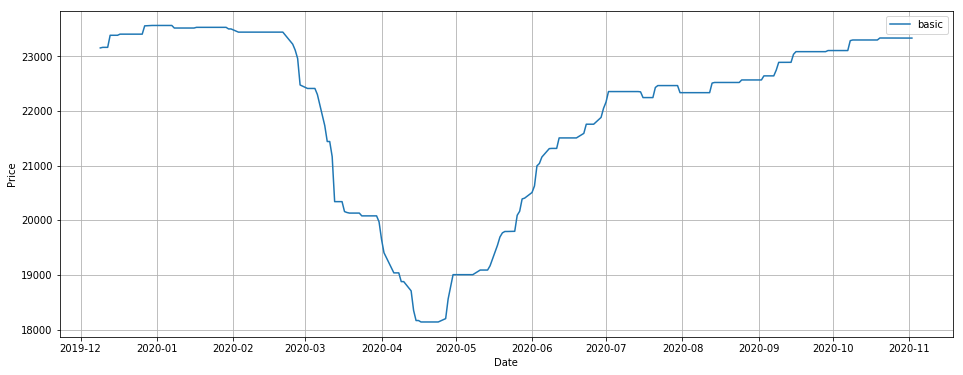

In [ ]:
plt.figure(figsize=(16,6))
plt.plot(df['basic_line'], label='basic')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# 転換線
high9 = high.rolling(window=9).max()
low9 = low.rolling(window=9).min()

df['turn_line'] = (high9 + low9) / 2

In [ ]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close,basic_line,turn_line
Date,,,,,,,,
2020-10-27,23485.800781,23232.310547,23376.960938,23485.800781,52700000,23485.800781,23338.495117,23469.735352
2020-10-28,23451.029297,23334.230469,23372.609375,23418.509766,67100000,23418.509766,23338.495117,23469.735352
2020-10-29,23374.099609,23170.759766,23170.759766,23331.939453,57500000,23331.939453,23338.495117,23438.959961
2020-10-30,23320.710938,22948.470703,23320.710938,22977.130859,76700000,22977.130859,23337.025391,23325.385742
2020-11-02,23370.910156,23096.789062,23110.740234,23295.480469,69700000,23295.480469,23337.025391,23325.385742


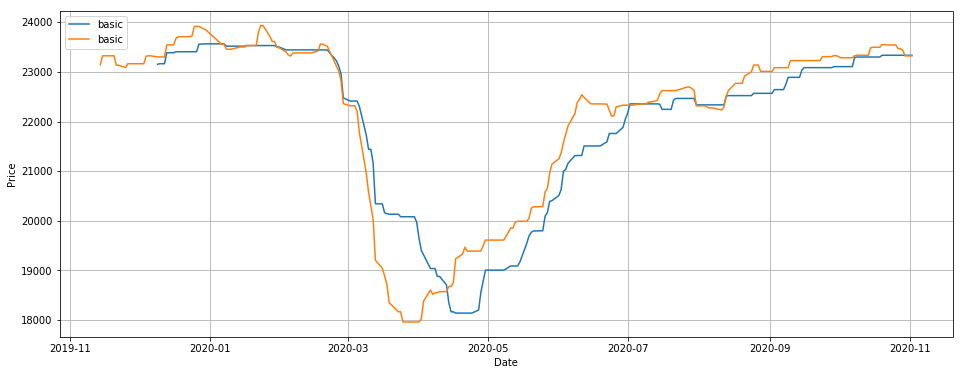

In [ ]:
plt.figure(figsize=(16,6))
plt.plot(df['basic_line'], label='basic')
plt.plot(df['turn_line'], label='basic')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# 先行スパン1
df['span1'] = (df['basic_line'] + df['turn_line']) / 2

In [ ]:
high52 = high.rolling(window=52).max()
low52 = low.rolling(window=52).min()

df['span2'] = (high52 + low52) / 2

In [ ]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close,basic_line,turn_line,span1,span2
Date,,,,,,,,,,
2020-10-27,23485.800781,23232.310547,23376.960938,23485.800781,52700000,23485.800781,23338.495117,23469.735352,23404.115234,23160.18457
2020-10-28,23451.029297,23334.230469,23372.609375,23418.509766,67100000,23418.509766,23338.495117,23469.735352,23404.115234,23160.18457
2020-10-29,23374.099609,23170.759766,23170.759766,23331.939453,57500000,23331.939453,23338.495117,23438.959961,23388.727539,23160.18457
2020-10-30,23320.710938,22948.470703,23320.710938,22977.130859,76700000,22977.130859,23337.025391,23325.385742,23331.205566,23160.18457
2020-11-02,23370.910156,23096.789062,23110.740234,23295.480469,69700000,23295.480469,23337.025391,23325.385742,23331.205566,23160.18457


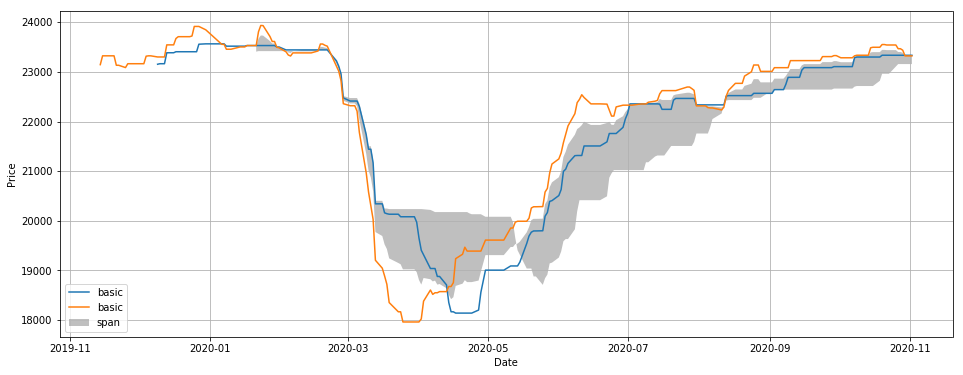

In [ ]:
plt.figure(figsize=(16,6))
plt.plot(df['basic_line'], label='basic')
plt.plot(df['turn_line'], label='basic')
plt.fill_between(date, df['span1'], df['span2'], facecolor='gray', alpha=0.5, label='span')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

In [ ]:
df['slow_line'] = df['Adj Close'].shift(-25)

In [ ]:
df.head()

,High,Low,Open,Close,Volume,Adj Close,basic_line,turn_line,span1,span2,slow_line
Date,,,,,,,,,,,
2019-11-01,22852.720703,22705.599609,22730.490234,22850.769531,65400000,22850.769531,NaN,NaN,NaN,NaN,23430.699219
2019-11-05,23328.519531,23090.939453,23118.789062,23251.990234,102100000,23251.990234,NaN,NaN,NaN,NaN,23410.189453
2019-11-06,23352.560547,23246.570312,23343.509766,23303.820312,77400000,23303.820312,NaN,NaN,NaN,NaN,23391.859375
2019-11-07,23336.000000,23253.320312,23283.140625,23330.320312,70900000,23330.320312,NaN,NaN,NaN,NaN,23424.810547
2019-11-08,23591.089844,23313.410156,23550.039062,23391.869141,94600000,23391.869141,NaN,NaN,NaN,NaN,24023.099609


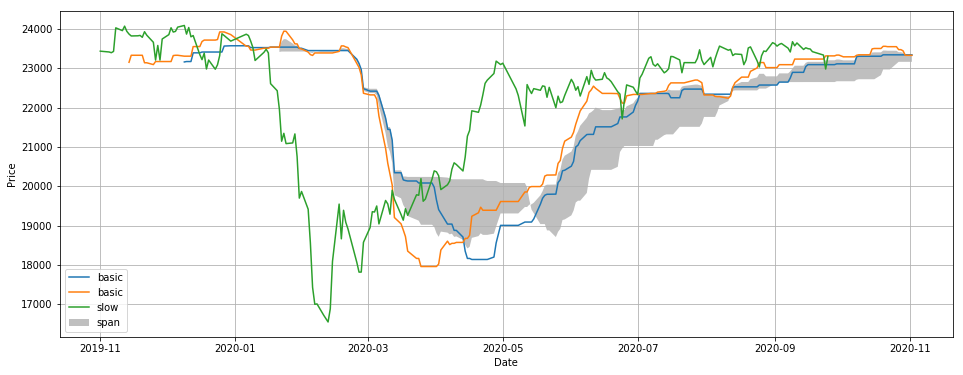

In [ ]:
plt.figure(figsize=(16,6))
plt.plot(df['basic_line'], label='basic')
plt.plot(df['turn_line'], label='basic')
plt.fill_between(date, df['span1'], df['span2'], facecolor='gray', alpha=0.5, label='span')
plt.plot(df['slow_line'], label='slow')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

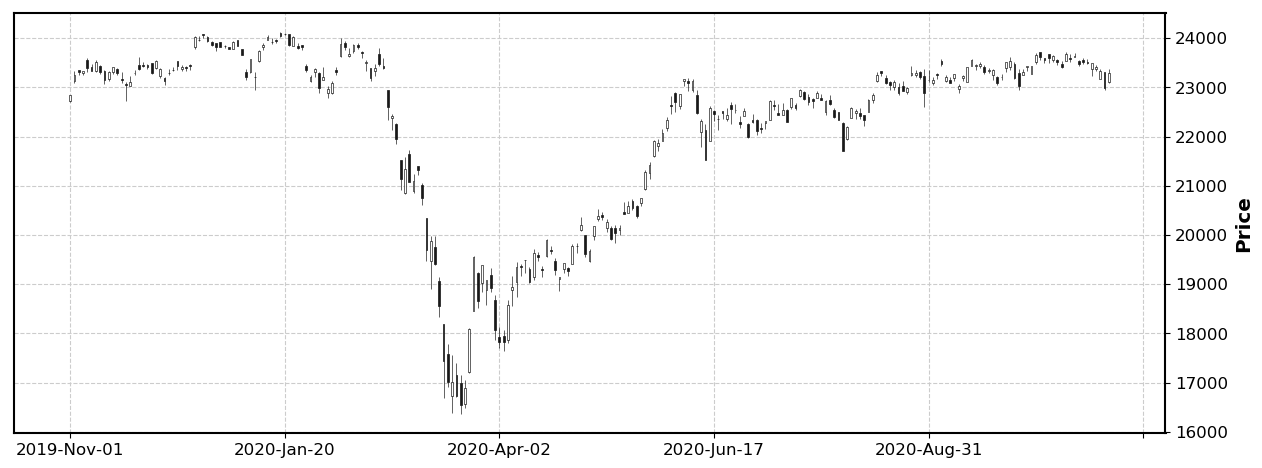

In [ ]:
mpf.plot(df, type='candle', figsize=(16,6), style='classic', xrotation=0)

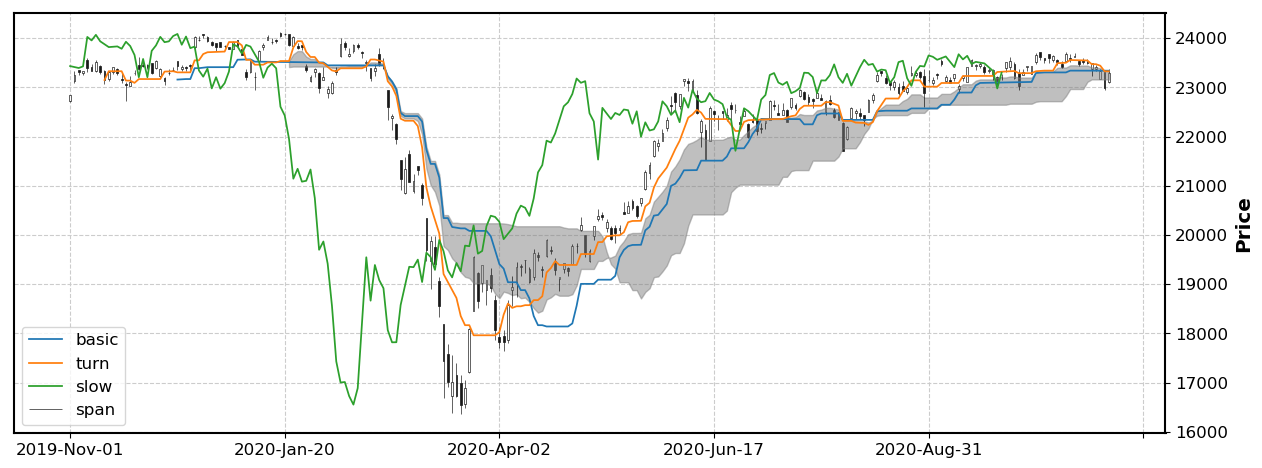

In [ ]:
lines = [mpf.make_addplot(df['basic_line']), # 基準線
         mpf.make_addplot(df['turn_line']), # 転換線
         mpf.make_addplot(df['slow_line']), # 遅行線 
        ]

labels = ['basic', 'turn', 'slow', 'span']
fig, ax = mpf.plot(df, type='candle', figsize=(16,6), style='classic', xrotation=0, addplot=lines, returnfig=True,
                   fill_between=dict(y1=df['span1'].values, y2=df['span2'].values, alpha=0.5, color='gray'))
ax[0].legend(labels)
plt.show()

In [ ]:
lines = [mpf.make_addplot(df['basic_line']), # 基準線
         mpf.make_addplot(df['turn_line']), # 転換線
         mpf.make_addplot(df['slow_line']), # 遅行線 
        ]

labels = ['basic', 'turn', 'slow', 'span']
fig, ax = mpf.plot(df, type='candle', figsize=(16,6), style='classic', xrotation=0, addplot=lines, returnfig=True,
                   fill_between=dict(y1=df['span1'].values, y2=df['span2'].values, alpha=0.5, color='gray'), savefig='ichimoku.png')
ax[0].legend(labels)